<a href="https://colab.research.google.com/github/jcs-lambda/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

# Data Set
https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data

Poker Hand Data Set - training set

In [0]:
import pandas as pd
import numpy as np

In [0]:
poker_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data'
poker_features = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
poker_feature_full_names = {'S1': 'Suit of card #1', 'C1' : 'Rank of card #1',
                            'S2': 'Suit of card #2', 'C2' : 'Rank of card #2',
                            'S3': 'Suit of card #3', 'C3' : 'Rank of card #3',
                            'S4': 'Suit of card #4', 'C4' : 'Rank of card #4',
                            'S5': 'Suit of card #5', 'C5' : 'Rank of card #5',
                            'CLASS' : 'Poker Hand'
                            }
poker_suits = {1:'Hearts', 2:'Spades', 3:'Diamonds', 4:'Clubs' }
poker_ranks = {1:'Ace', 2:'Two', 3:'Three', 4:'Four', 5:'Five', 6:'Six', 7:'Seven',
               8:'Eight', 9:'Nine', 10:'Ten', 11:'Jack', 12:'Queen', 13:'King'
               }
poker_hands = {0:'Nothing in hand', 1:'One pair', 2:'Two pair', 3:'Three of a kind', 4:'Straight',
               5:'Flush', 6:'Full house', 7:'Four of a kind', 8:'Straight flush', 9:'Royal flush'
               }

def suit_converter(suit):
  return poker_suits[int(suit)]

def rank_converter(rank):
  return poker_ranks[int(rank)]

def hand_converter(hand):
  return poker_hands[int(hand)]

poker_converters = {'S1':suit_converter, 'C1':rank_converter, 'S2':suit_converter, 'C2':rank_converter,
                    'S3':suit_converter, 'C3':rank_converter, 'S4':suit_converter, 'C4':rank_converter,
                    'S5':suit_converter, 'C5':rank_converter, 'CLASS':hand_converter
                    }
df = pd.read_csv(poker_data_url, header=None, names=poker_features, converters=poker_converters)

#### headers / first and last rows / correct number of rows and columns

In [23]:
# are the headers showing up properly - yep
# first 5 rows  
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,Hearts,Ten,Hearts,Jack,Hearts,King,Hearts,Queen,Hearts,Ace,Royal flush
1,Spades,Jack,Spades,King,Spades,Ten,Spades,Queen,Spades,Ace,Royal flush
2,Diamonds,Queen,Diamonds,Jack,Diamonds,King,Diamonds,Ten,Diamonds,Ace,Royal flush
3,Clubs,Ten,Clubs,Jack,Clubs,Ace,Clubs,King,Clubs,Queen,Royal flush
4,Clubs,Ace,Clubs,King,Clubs,Queen,Clubs,Jack,Clubs,Ten,Royal flush


In [24]:
# last 5 rows
df.tail()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
25005,Diamonds,Nine,Spades,Six,Clubs,Jack,Clubs,Queen,Spades,Four,Nothing in hand
25006,Clubs,Ace,Clubs,Ten,Diamonds,King,Diamonds,Four,Hearts,Ten,One pair
25007,Spades,Ace,Spades,Ten,Clubs,Four,Clubs,Ace,Clubs,King,One pair
25008,Spades,Queen,Clubs,Three,Hearts,Ten,Hearts,Queen,Clubs,Nine,One pair
25009,Hearts,Seven,Diamonds,Jack,Diamonds,Three,Clubs,Eight,Diamonds,Seven,One pair


In [25]:
# correct number of rows and columns - yes
df.shape

(25010, 11)

#### missing values

In [31]:
# missing values?? UCI says no
# i agree, any missing of out of bounds data would have exploded my converter functions
for column in poker_features:
  print(df[column].value_counts())
  print()

df.isnull().sum()

Clubs       6312
Spades      6298
Diamonds    6250
Hearts      6150
Name: S1, dtype: int64

Ace      1982
Nine     1967
Seven    1961
Eight    1948
Two      1941
Queen    1940
Jack     1926
Four     1919
King     1915
Five     1892
Three    1882
Ten      1877
Six      1860
Name: C1, dtype: int64

Hearts      6309
Clubs       6300
Spades      6244
Diamonds    6157
Name: S2, dtype: int64

King     2007
Ace      1985
Six      1956
Queen    1939
Jack     1931
Ten      1922
Two      1921
Three    1912
Seven    1912
Four     1905
Eight    1898
Nine     1877
Five     1845
Name: C2, dtype: int64

Clubs       6419
Hearts      6230
Spades      6208
Diamonds    6153
Name: S3, dtype: int64

Ten      2000
Queen    1987
Three    1965
Four     1935
Seven    1927
Five     1920
Jack     1913
Eight    1912
Two      1910
King     1910
Ace      1895
Six      1884
Nine     1852
Name: C3, dtype: int64

Diamonds    6314
Hearts      6269
Spades      6248
Clubs       6179
Name: S4, dtype: int64

Three    1999


S1       0
C1       0
S2       0
C2       0
S3       0
C3       0
S4       0
C4       0
S5       0
C5       0
CLASS    0
dtype: int64

#### describe

In [32]:
# describe the data
# can't describe numerically because I changed all to strings
df.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
count,25010,25010,25010,25010,25010,25010,25010,25010,25010,25010,25010
unique,4,13,4,13,4,13,4,13,4,13,10
top,Clubs,Ace,Hearts,King,Clubs,Ten,Diamonds,Three,Diamonds,Eight,Nothing in hand
freq,6312,1982,6309,2007,6419,2000,6314,1999,6314,1994,12493


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [47]:
import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()

iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

!curl -s 2>/dev/null https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data | head

Saving iris.data to iris.data
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


In [0]:
iris_columns =  ['SEPAL_LENGTH_CM', 'SEPAL_WIDTH_CM', 'PETAL_LENGTH_CM', 'PETAL_WIDTH_CM', 'CLASS']
iris_df = pd.read_csv('iris.data', header=None, names=iris_columns)

#### headers / first and last rows / correct number of rows and columns

In [49]:
iris_df.head()

,SEPAL_LENGTH_CM,SEPAL_WIDTH_CM,PETAL_LENGTH_CM,PETAL_WIDTH_CM,CLASS
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
iris_df.tail()

,SEPAL_LENGTH_CM,SEPAL_WIDTH_CM,PETAL_LENGTH_CM,PETAL_WIDTH_CM,CLASS
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [51]:
# UCI claims 150 items with 4 attributes and 1 predictive attribute
iris_df.shape

(150, 5)

#### missing values

In [54]:
# no NaNs, no empty/unknown strings, no width measurements of 0
#  = should be good to go
for column in iris_df.columns:
  print(column, sorted(set(iris_df[column].values)))

print()
iris_df.isnull().sum()

SEPAL_LENGTH_CM [4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9]
SEPAL_WIDTH_CM [2.0, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.4]
PETAL_LENGTH_CM [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 3.0, 3.3, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.3, 6.4, 6.6, 6.7, 6.9]
PETAL_WIDTH_CM [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
CLASS ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']



SEPAL_LENGTH_CM    0
SEPAL_WIDTH_CM     0
PETAL_LENGTH_CM    0
PETAL_WIDTH_CM     0
CLASS              0
dtype: int64

#### describe

In [55]:
iris_df.describe()

,SEPAL_LENGTH_CM,SEPAL_WIDTH_CM,PETAL_LENGTH_CM,PETAL_WIDTH_CM
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [56]:
iris_df.describe(exclude='number')

,CLASS
count,150
unique,3
top,Iris-versicolor
freq,50


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [63]:
# crosstabs don't do much for either dataset
# if I could combine all cards ( ?[1-5] ) then crosstab with hands, might show something worthwhile
pd.crosstab(df['CLASS'], df['S2'])

S2,Clubs,Diamonds,Hearts,Spades
CLASS,,,,
Flush,19,12,12,11
Four of a kind,2,1,0,3
Full house,7,11,8,10
Nothing in hand,3152,3117,3160,3064
One pair,2653,2598,2667,2681
Royal flush,2,1,1,1
Straight,21,21,22,29
Straight flush,1,1,2,1
Three of a kind,128,119,128,138


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

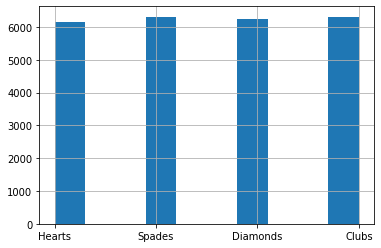

In [86]:
# Histograms
df['S1'].hist();

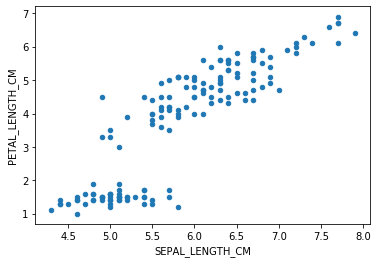

In [80]:
# scatterplot
iris_df.plot.scatter('SEPAL_LENGTH_CM', 'PETAL_LENGTH_CM');

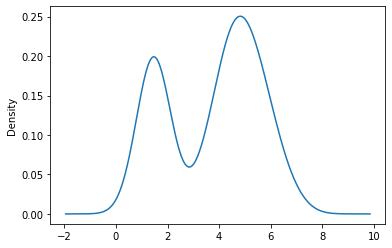

In [89]:
# density plot
iris_df['PETAL_LENGTH_CM'].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


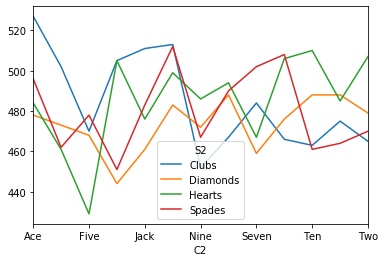

In [91]:
pd.crosstab(df['C2'], df['S2']).plot();

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.